# We are going to do multiclasss classification , logistic regression gave us output {0,1} , SVM gave us ouput in {-1,1}. 

## One vs One is technique in which we assume that we have N classes then we train Nc2 parameters classifiers for each two classes. So prediction happens using the majority vote from Nc2 classifiers. This takes O(N^2) time , this can be used for large datasets which cannot be fit into the memory.
## Another technique is One vs Rest, here we take a single class and rest of the class(es) are treated as -ve(-1), while training with SVM. This type of classifier will need more memory but will take only N classifiers. Each N classifier will tell wheather the point belongs to that class or not. We can train N classifiers parallely and hence takes O(N) time.
## sklearn has 'ovo' and 'ovr' in SVM and Logistic regression for One vs One and One vs Rest

# We would use one vs one technique
# Data Preparation

In [2]:
import numpy as np
import os
from pathlib import Path
from keras.preprocessing import image

In [3]:
p = Path("Dataset/")
print(type(p))

<class 'pathlib.WindowsPath'>


In [4]:
# Path has a method glob which accepts a regular expression for what type of data do we need , we can go through al the files through glob
dirs = p.glob("*")
for folder_names in dirs:
    print(folder_names)
    # Now we want to split the labels
    label = str(folder_names).split("\\")[-1][:-1] # \\ because its format specifier so \\
    print(label)

Dataset\cats
cat
Dataset\dogs
dog
Dataset\horses
horse
Dataset\humans
human


In [7]:
# So now getting the image from the directories and then resizing them to 100*100 and then storing them into RGB array .
dirs = p.glob("*")

label_dict = {"cat":0,"dog":1,"horse":2,"human":3}
image_data = []
labels = []
    

for folder_names in dirs:
    # Now we want to split the labels
    label = str(folder_names).split("\\")[-1][:-1] # \\ because its format specifier so \\
  
    for img_path in folder_names.glob("*.jpg"):  # We want jpg files
        img = image.load_img(img_path,target_size=(100,100)) 
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])

In [8]:
print(len(image_data))
print(len(labels))

808
808


In [10]:
# Converting data into numpy arrays
image_data = np.array(image_data,dtype='float32')/255.0 # We were not able to make the image 
labels = np.array(labels)
print(image_data.shape,labels.shape)

(808, 100, 100, 3) (808,)


## We have 808 images each is of 100*100 size and each 100*100 has 3 RGB channels

# Data Visualization

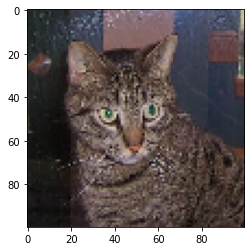

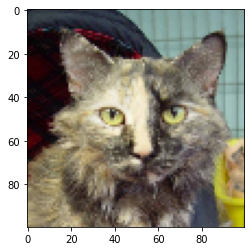

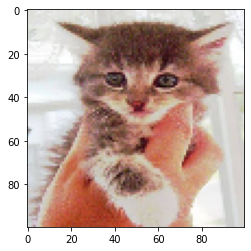

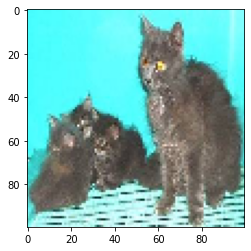

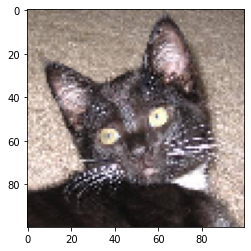

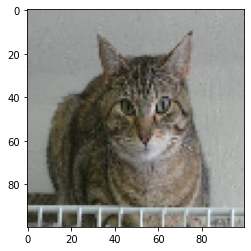

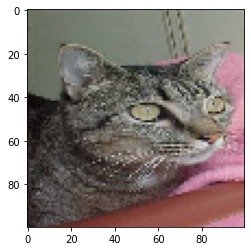

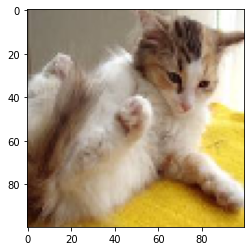

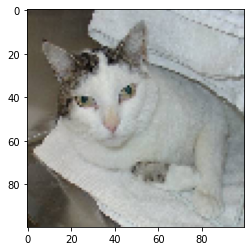

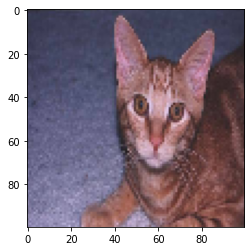

In [13]:
def DrawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.show()
    return 

for i in range(10):
    DrawImg(image_data[i])

# For ML learning we must shuffle ouor data first.

In [19]:
import random

# We need first to zip cats to 0, dogs to 1, horses to 2 and humans to 3 the shuffle else it will diturb the result

combined = list(zip(image_data,labels))
random.shuffle(combined)

# Now unzipping the combined data
image_data[:],labels[:] = zip(*combined)

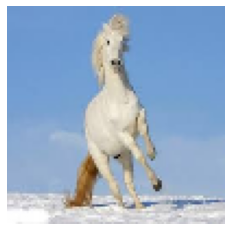

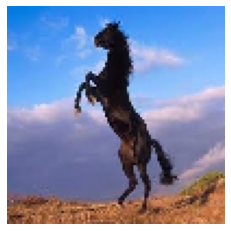

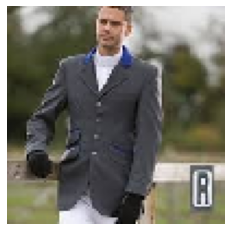

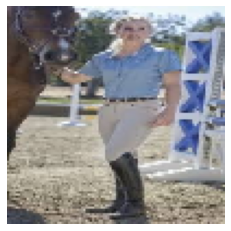

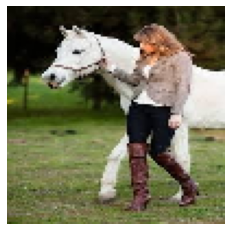

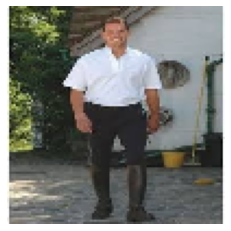

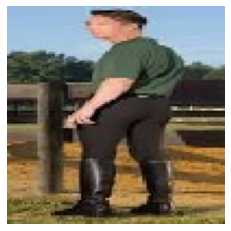

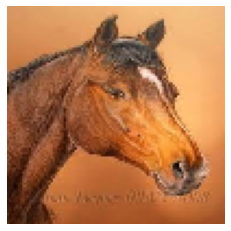

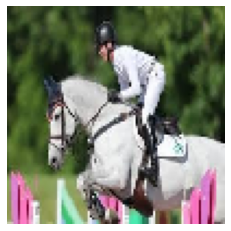

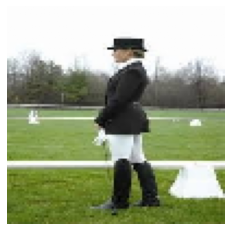

In [20]:
def DrawImg(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    # turning off the axes
    plt.axis("off")
    plt.show()
    return 

# We would get shguffled data
for i in range(10):
    DrawImg(image_data[i])

# SVM classifier

In [21]:
# SVM class
class SVM:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0 # bias term
        
    def hinge_loss(self,W,b,X,Y):
        loss = 0.0
        
        loss+= .5*np.dot(W,W.T)
        m=X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C * max(0,(1-ti))
            
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.001,maxItr=300):
        
        no_of_features = X.shape[1]
        no_of_samples = X.shape[0]
        
        n= learning_rate
        c=self.C
        
        #Initialize the moedl parameter
        W=np.zeros((1,no_of_features))
        bias=0
        #print(self.hinge_loss(W,bias,X,Y))
        
        # Training from here , Weight and bias update rule
        losses = []
        for i in range(maxItr):
            # Training Loop
            l = self.hinge_loss(W,bias,X,Y)
            losses.append(l)
            
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # Batch Gradient Descent with random Shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                # Assume 0 gradient for the batch
                gradw=0
                gradb=0
                
                #Iterate over all exapmles in the mini batch
                for j in range(batch_start,batch_start+batch_size):
                    # Should not go out of batch
                    if j<no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bias)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                
                # Gradient for the batch is ready to update
                W = W-n*W + n*gradw
                bias = bias + n*gradb
            
        self.W=W
        self.b = bias
        return W,bias,losses

In [22]:
# We need to convert into one vs one classifier as its binary classification

In [23]:
print(image_data.shape)

(808, 100, 100, 3)


In [25]:
#Now we will flatten each image into a single row
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 30000)
(808,)


In [26]:
# We would male the image size size 32*32 so that we get lesser number of features(columns), in case of 100*100 we got 30000 features
dirs = p.glob("*")

label_dict = {"cat":0,"dog":1,"horse":2,"human":3}
image_data = []
labels = []
    

for folder_names in dirs:
    # Now we want to split the labels
    label = str(folder_names).split("\\")[-1][:-1] # \\ because its format specifier so \\
  
    for img_path in folder_names.glob("*.jpg"):  # We want jpg files
        img = image.load_img(img_path,target_size=(32,32)) 
        img_array=image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[label])

In [27]:
image_data = np.array(image_data,dtype='float32')/255.0 # We were not able to make the image 
labels = np.array(labels)
print(image_data.shape,labels.shape)

(808, 32, 32, 3) (808,)


In [28]:
combined = list(zip(image_data,labels))
random.shuffle(combined)

# Now unzipping the combined data
image_data[:],labels[:] = zip(*combined)

In [29]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(808, 3072)
(808,)


## Now the features are reduced

In [31]:
CLASSES = len(np.unique(labels))
print(CLASSES)

4


In [32]:
def classWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i]=[]
        
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
    
    # Converting to numpy array
    for k in data.keys():
        data[k] = np.array(data[k])
        
    return data


In [33]:
data = classWiseData(image_data,labels)
print(data[0].shape[0])

202


In [35]:
print(data[0].shape) # Data of cat
print(data[1].shape) # Data of dogs
print(data[2].shape) # Data of horses
print(data[3].shape) # Data of humans

(202, 3072)
(202, 3072)
(202, 3072)
(202, 3072)


## 202 images each having 3072 features

In [40]:
# We need to merge two data into x and y , x will contain data of d1 and d2 and y will contain 1 and -1, denoting different classes
def getDataPairForSVM(d1,d2):
    l1,l2 = d1.shape[0],d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = 1
    
    return data_pair,data_labels

# Training NC2 SVM

In [37]:
mySVM = SVM()

In [38]:
def trainSVM(x,y):
    svm_classifier = {}
    
    for i in range(CLASSES):
        svm_classifier[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair)
            svm_classifier[i][j] = (wts,b)
            
    return svm_classifier


In [41]:
svm_classifier = trainSVM(image_data,labels)

In [44]:
# Parameters for cats and dogs
cat_dogs = svm_classifier[0][1]
print(cat_dogs[0].shape)
print(cat_dogs[1])

(1, 3072)
-1.1700000000000008


In [45]:
cats_humans = svm_classifier[0][3]
print(cats_humans[0].shape)
print(cats_humans[1])

(1, 3072)
-0.8250000000000006


# Prediction

In [48]:
# Binary predict is the method for actual svm
def binaryPredict(x,w,b):
    z = np.dot(x,w.T) + b
    if z>=0:
        return 1
    else:
        return -1
    

In [52]:
def Predict(x):
    
    count = np.zeros((CLASSES))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifier[i][j]
            # We need to take a majority prediction
            z = binaryPredict(x,w,b)
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
            
    #print(count)
    final_predict = np.argmax(count)
    return final_predict


In [53]:
print(Predict(image_data[0]))
print(labels[0])

0
3


In [56]:
def accuracy(x,y):
    count = 0
    
    for i in range(x.shape[0]):
        prediction = Predict(x[i])
        if(prediction == y[i]):
            count += 1
            
    return count/x.shape[0]
        

In [57]:
accuracy(image_data,labels)

0.31064356435643564

# Its giving around 31% accuracy which is not a good accuracy

# Lets try over only 2 classes

In [59]:
import matplotlib.pyplot as plt

[404.0, 5501.571155797267, 4426.203480011423, 3130.152378760288, 2453.471320985523, 1685.8482305471575, 749.276996513685, 4410.431863176223, 3483.3760476677253, 3339.0401391732485, 2706.1419958872525, 1983.8367142994562, 587.6053014657895, 2982.35261431274, 1758.8768616557022, 1124.1214859768213, 836.0583930790555, 1963.126566426129, 1319.2594200582957, 1795.0603808208796, 2100.850364553092, 1886.111864152631, 1555.3733301866766, 2165.296229720196, 2129.0571861968588, 2129.3279231265433, 1914.2968376097092, 1639.260778958008, 2553.956808035322, 2008.6255318140925, 1189.9391294402392, 1902.3215167189296, 3963.6735777512554, 3518.75563956197, 3482.7200774279468, 3241.4463805072533, 3635.9022521329957, 3177.270241074874, 2393.6980516635012, 2669.544030204125, 3023.7827330631508, 2942.4122567648124, 2306.9390253954293, 2697.1683504987745, 2810.3856486945283, 4367.75161952065, 2818.9995115010506, 2317.107983055547, 1610.8839631188714, 2816.6465544197545, 2592.663303275869, 2908.385130164470

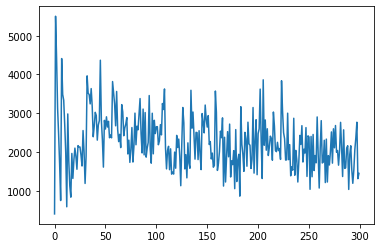

In [60]:
xp, yp = getDataPairForSVM(data[0],data[1])
w,b,loss = mySVM.fit(xp,yp)
print(loss)
plt.plot(loss)

# Loss is incresing as learning rate is too high

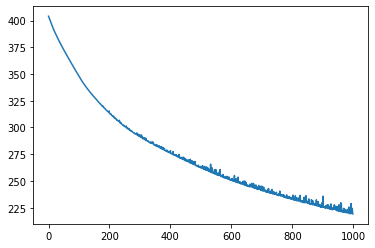

In [62]:
# Made Learning rate 10^-5 and iterated 1000 times
xp, yp = getDataPairForSVM(data[0],data[1])
w,b,loss = mySVM.fit(xp,yp,learning_rate=0.00001,maxItr=1000)
#print(loss)
plt.plot(loss)

# Changing learning rate and epocs gives better results

In [63]:
def trainSVM(x,y):
    svm_classifier = {}
    
    for i in range(CLASSES):
        svm_classifier[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSVM(data[i],data[j])
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxItr=1000)
            svm_classifier[i][j] = (wts,b)
            
            plt.plot(loss)
            plt.show()
            
    return svm_classifier


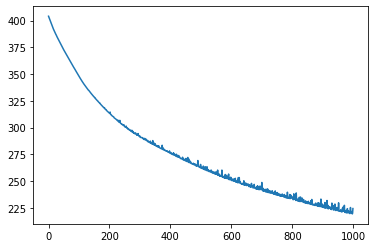

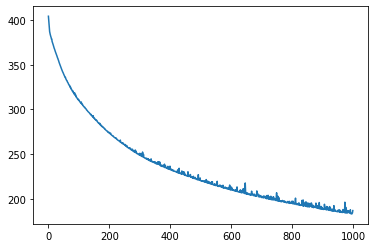

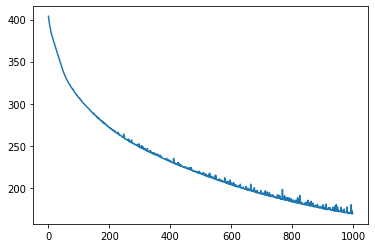

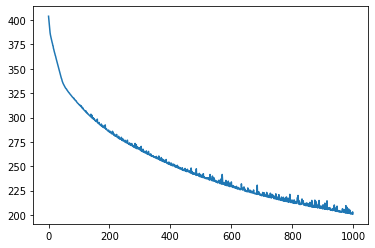

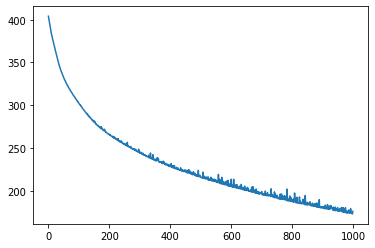

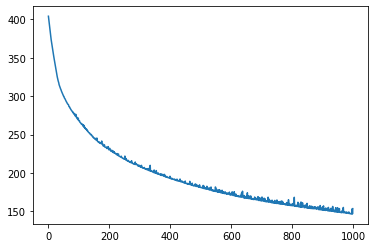

In [70]:
svm_classifier = trainSVM(image_data,labels)

In [71]:
accuracy(image_data,labels)

0.5915841584158416

# Now our accuracy is improved to 59%

# Using sklearn

In [65]:
from sklearn import svm

In [66]:
svm_classifier = svm.SVC(kernel='linear',C=1.0)


In [67]:
svm_classifier.fit(image_data,labels)

SVC(kernel='linear')

In [68]:
svm_classifier.score(image_data,labels)

0.6274752475247525

# sklearn gives accuracy around 63 %